# 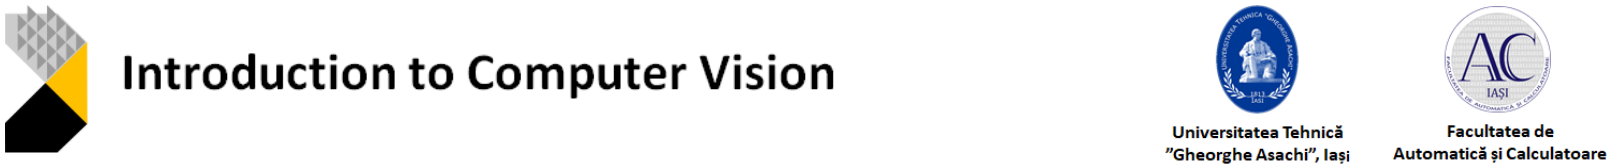

  The Intro to Computer Vision labs will be run in Google Colaboratory, a Jupyter notebook environment that runs entirely in the cloud, you don't need to download anything. To run these labs, you must have a Google account.

Step 1: click on the assignment invite link -> **Accept this assignment**. Refresh page -> individual repo for the specific assignment is created automatically

Step 2: Navigate to http://colab.research.google.com/github -> Click the **Include Private Repos** checkbox -> **select the correct repo** (SistemeDeVedereArtificiala/assignment_name-student_name) -> Click on the jupyter notebook of the current assignment

Step 3: [GitHub sign-in window] In the popup window, sign-in to your Github account and authorize Colab to read the private files.

Step 4: [in colab] **File** -> **Save a copy to GitHub**. Select the correct repository for the SPECIFIC assignment -> Click the **Include Colab Link** -> Click **OK**

Step 5: [in colab] Navigate to the **Runtime** tab --> **Change runtime type**, under **Hardware accelerator** select **GPU/TPU** (tensor processing unit) according to your needs.
  
  <font color='red'>Read the suggestions and accomplish all tasks marked with **#TODO**.

!!! At the end of each laboratory **REPEAT step 4 in order to SAVE** the answers to your private repository (individual for each assignment)</font>

# Project 3: Image stitching

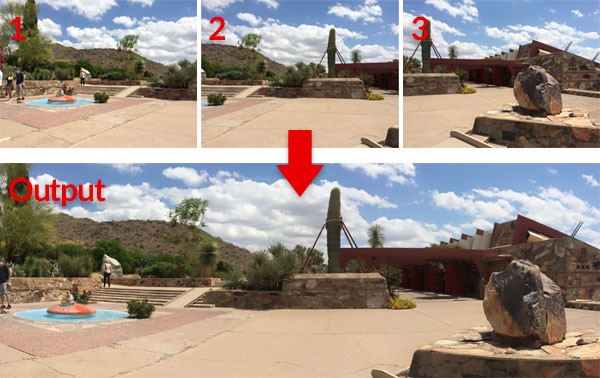

Q: We have two images – how do we combine them?

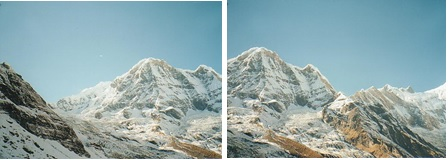



A: Image stitching using Local Features:
1. Detection: Identify the interest points

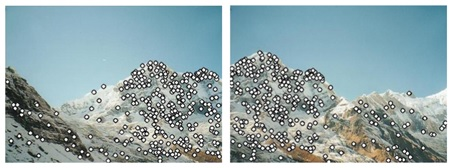

2. Description: Extract vector feature descriptor surrounding each interest point.

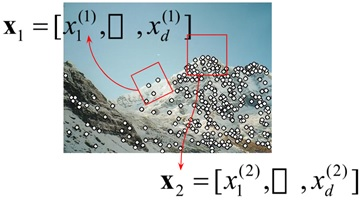

3. Matching: Determine correspondence between descriptors in two views

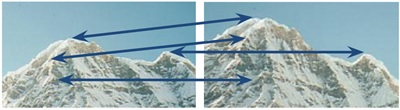

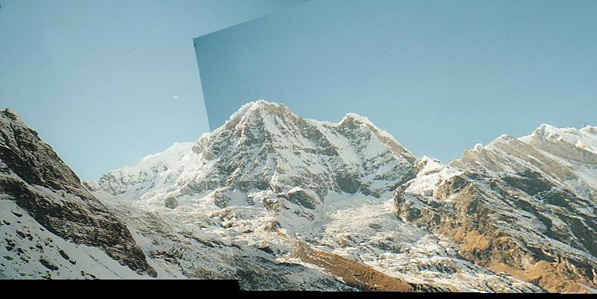

## Week 1: Scale Invariant Feature Transform (SIFT) Algorithm

In 2004, D.Lowe, University of British Columbia, came up with a new algorithm, Scale Invariant Feature Transform (SIFT) in his paper, **Distinctive Image Features from Scale-Invariant Keypoints**, which extract keypoints and compute its descriptors. This paper is easy to understand and considered to be the best material available on SIFT.

###In general, SIFT algorithm can be decomposed into four steps:
1.  Feature point (also called keypoint) detection
2.  Feature point localization
3.  Orientation assignment
4.  Feature descriptor generation

In [1]:
!pip install opencv-python==3.4.2.17

ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.2.17 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86)
ERROR: No matching distribution found for opencv-python==3.4.2.17


In [2]:
!pip install opencv-contrib-python==3.4.2.17

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.4.2.17 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86)
ERROR: No matching distribution found for opencv-contrib-python==3.4.2.17


In [39]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#TODO: add test images to My Drive: https://drive.google.com/drive/folders/1fu9tFLtbUKBQUS3ZN413ctnBkiGKADpc?usp=sharing

campus	lab_example  melbourne	Office	panorama  scottsdale  stitching


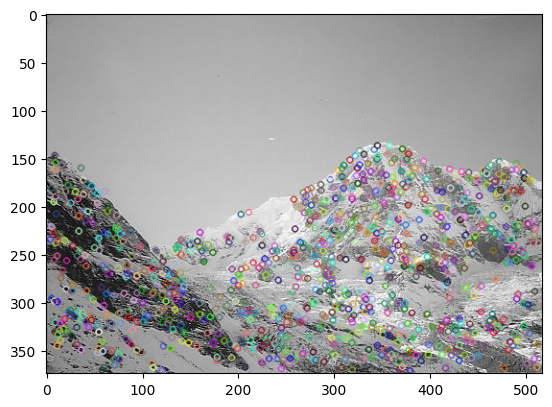

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#TODO: read lab_example/sift1.jpg
!ls "/content/drive/MyDrive/Facultate/SVA/Sisteme de Vedere Artificială - proiecte de laborator/P3/test_images"
images_path = "/content/drive/MyDrive/Facultate/SVA/Sisteme de Vedere Artificială - proiecte de laborator/P3/test_images"

cv2.imread(images_path+"/lab_example/sift1.jpg")
img = cv2.imread(images_path+"/lab_example/sift1.jpg")

#TODO: compute grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#create sift
sift = cv2.xfeatures2d.SIFT_create()

#TODO: detect keypoints
kp = sift.detect(img, None)

#TODO: draw detected keypoints on grayscale image
img = cv2.drawKeypoints(img, kp, img)

plt.imshow(img, cmap='gray')

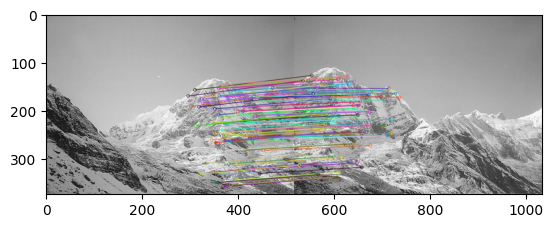

In [24]:
#TODO: read lab_example/sift2.jpg
img2 = cv2.imread(images_path+"/lab_example/sift2.jpg")
img = cv2.imread(images_path+"/lab_example/sift1.jpg")

#TODO: compute grayscale transform for sift2.jpg

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#TODO: find the keypoints and descriptors with SIFT for sift1.jpg & sift2.jpg (see sift.detectAndCompute)
sift = cv2.xfeatures2d.SIFT_create()
kp1, ds1 = sift.detectAndCompute(img, None)
kp2, ds2 = sift.detectAndCompute(img2,None)

#feature matching
#TODO: create Brute Force Matcher (see cv2.BFMatcher)
bf = cv2.BFMatcher()

#TODO: compute matches & sort by distance
matches = bf.match(ds1, ds2)
matches = sorted(matches, key = lambda x:x.distance)

#TODO: draw matches
result = cv2.drawMatches(img, kp1, img2, kp2, matches[:100], None , flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(result)
plt.show()

###Feature Matching
Classical feature descriptors (SIFT, SURF, ...) are usually compared and matched using the Euclidean distance (or L2-norm). Since SIFT and SURF descriptors represent the histogram of oriented gradient (of the Haar wavelet response for SURF) in a neighborhood, alternatives of the Euclidean distance are histogram-based metrics ( χ2, Earth Mover’s Distance (EMD), ...).

Arandjelovic et al. proposed in [Three things everyone should know to improve object retrieval](https://dl.acm.org/doi/10.5555/2354409.2355123) to extend to the RootSIFT descriptor:

> a square root (Hellinger) kernel instead of the standard Euclidean distance to measure the similarity between SIFT descriptors leads to a dramatic performance boost in all stages of the pipeline.


Binary descriptors (ORB, BRISK, ...) are matched using the [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance). This distance is equivalent to count the number of different elements for binary strings (population count after applying a XOR operation):

$$d_{hamming} (a, b) = \sum_{i=0}^{n-1}(a_i \otimes b_i)$$

To filter the matches, Lowe proposed in [Distinctive image features from scale-invariant keypoints](https://link.springer.com/article/10.1023%2FB%3AVISI.0000029664.99615.94) to use a distance ratio test to try to eliminate false matches. The distance ratio between the two nearest matches of a considered keypoint is computed and it is a good match when this value is below a threshold. Indeed, this ratio allows helping to discriminate between ambiguous matches (distance ratio between the two nearest neighbors is close to one) and well discriminated matches. The figure below from the SIFT paper illustrates the probability that a match is correct based on the nearest-neighbor distance ratio test.



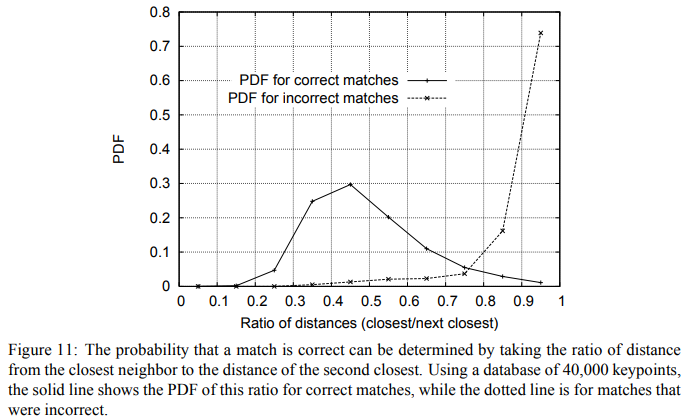

Alternative or additional filterering tests are:

* cross check test (good match **(fa,fb)** if feature **fb** is the best match
for **fa** in **Ib** and feature **fa** is the best match for **fb** in **Ia**)
* geometric test (eliminate matches that do not fit to a geometric model, e.g. RANSAC or robust homography for planar objects)


In [25]:
!pip install opencv-contrib-python


In [26]:

#TODO: detect keypoints using SURF detector & compute descriptors for images test_images/panorama/yosemite1.jpg & yosemite2.jpg
#TODO: match descriptor vectors using FLANN matcher
#TODO: filter matches (Lowe's ratio test)
#TODO: draw matches

# Import libraries
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load images
img1 = cv2.imread(images_path+'/panorama/yosemite1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(images_path+'/panorama/yosemite2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create(400)

# Detect keypoints and compute descriptors
kp1, des1 = surf.detectAndCompute(img1, None)
kp2, des2 = surf.detectAndCompute(img2, None)

# Use FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors
matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display result
cv2_imshow(img_matches)


error: OpenCV(4.11.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
!ls "/content/drive/MyDrive/Facultate/SVA/Sisteme de Vedere Artificială - proiecte de laborator/P3/test_images"


In [40]:
#TODO: take 3-4 pictures (with a camera/phone/webcam/etc) for a 180 degree panorama and draw matches between each two pictures in a row
images_path_final = "/content/drive/MyDrive/"
img1 = cv2.imread(images_path_final+'poza1.jpg')
img2 = cv2.imread(images_path_final+'poza2.jpg')
img3 = cv2.imread(images_path_final+'poza3.jpg')


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

#TODO: find the keypoints and descriptors with SIFT for sift1.jpg & sift2.jpg (see sift.detectAndCompute)
sift = cv2.xfeatures2d.SIFT_create()
kp1, ds1 = sift.detectAndCompute(img1, None)
kp2, ds2 = sift.detectAndCompute(img2,None)
kp3, ds3 = sift.detectAndCompute(img3,None)

#feature matching
#TODO: create Brute Force Matcher (see cv2.BFMatcher)
bf = cv2.BFMatcher()

#TODO: compute matches & sort by distance
matches = bf.match(ds1, ds2,ds3)
matches = sorted(matches, key = lambda x:x.distance)

#TODO: draw matches
result = cv2.drawMatches(img1, kp1, img2, kp2,img3,kp3, matches[:100], None , flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(result)
plt.show()


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
